In [1]:
# sigmoid curve fitting is from the https://gist.github.com/andrewgiessel/5684769
# good discussion here:  http://stackoverflow.com/questions/4308168/sigmoidal-regression-with-scipy-numpy-python-etc

## Import dependecies and define fuctions

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.optimize as opt
from scipy.optimize import fsolve
from sklearn.metrics import r2_score

a_: -6.2364   b_(y_min): 78.269   c_(steepness): 2.153241168157139  d_(x0_mid): 0.4999999999999922
y_max : 72.0326   y_90: 72.65624000000001   y_10: 77.64536000000001   y_min: 78.269
R^2:  0.9875699937716542
x_90 [1.52042661] x_10:  [-0.52042661] x_gap:  [-2.04085321]


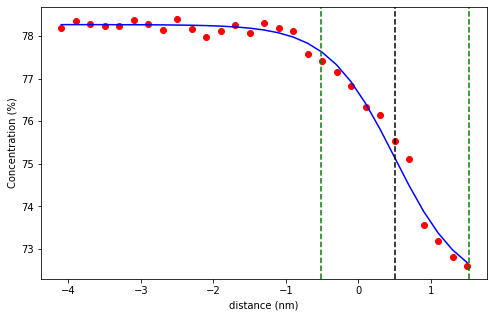

In [3]:
# Define the sigmoid function
# define a : maximum value, b: minimum, c:logistic growth rate or steepness, d: x_mid point 

def fit_sigmoid(x, y):
    # nonlinear least squares curve fitting with sigmoid fuction
    # bounds are the Lower and upper bounds on parameters. Important to avoid the covariance error
    
    def sigmoid(x, c, d):
        a = -6.2364
        b = 78.269
        return a / (1. + np.exp(-c * (x - d))) + b


    (c_, d_), _ = opt.curve_fit(sigmoid, x, y, bounds=([-5, -0.5], [5, 0.5]))

    a = -6.2364
    b = 78.269
    a_ = a
    b_ = b

    #print a, b, c, d values
    print ("a_: " + str(a_),  "  b_(y_min): " + str(b_), "  c_(steepness): " + str(c_) ," d_(x0_mid): " + str(d_))

    # define and print the y_max, y_min, y_90, and y_10 values
    y_max = a_+ b_
    y_90 = a_*0.9+b_
    y_10 = a_*0.1+b_
    y_min = b_
    print("y_max : "+ str(y_max), "  y_90: " + str(y_90), "  y_10: " + str(y_10), "  y_min: " + str(b_))

    # fitting with sigmoid fuction
    y_fit = sigmoid(x, c_, d_)

    print('R^2: ', r2_score(y_fit, y))

    # define sigmiod 90, 10% fuction.
    def fp(p) :
        f1 = sigmoid(p, c_, d_) - y_90
        return f1

    def fq(q) :
        f2 = sigmoid(q, c_, d_) - y_10
        return f2
    
    #Solving the equation (p=90%, q= 10%)
    p_sol = fsolve(fp,0)
    q_sol = fsolve(fq,0)
    x_gab = q_sol-p_sol

    print("x_90", str(p_sol),"x_10: ", str(q_sol), "x_gap: ", str(x_gab))

    # plot with 10- 90% window
    fig, ax = plt.subplots(1, 1, figsize=(8, 5))
    ax.plot(x, y, 'ro')
    ax.plot(x, y_fit, 'b-')
    plt.axvline(x=d_, color='k', linestyle='--')
    plt.axvline(x=p_sol, color='g', linestyle='--')
    plt.axvline(x=q_sol, color='g', linestyle='--')
    plt.xlabel("distance (nm)")
    plt.ylabel('Concentration (%)')
    
    return

# import csv data

df= pd.read_csv('Re_700_0h.csv')
# assigne x and y values
x = df['distance'].to_numpy()
y = df['Ni'].to_numpy()

# Max, Min, 90%, 10% and width values using fit_sigmoid fuction
fit_sigmoid(x, y)

a_: 9.276   b_(y_min): 10.829   c_(steepness): 2.1919225064336736  d_(x0_mid): 0.32015214714103446
y_max : 20.105   y_90: 19.1774   y_10: 11.7566   y_min: 10.829
R^2:  0.9922534643186246
x_90 [1.48905212] x_10:  [-0.53304166] x_gap:  [-2.02209379]


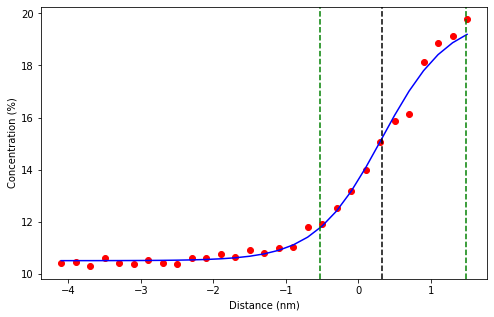

In [4]:
# Define the sigmoid function
# define a : maximum value, b: minimum, c:logistic growth rate or steepness, d: x_mid point 

def fit_sigmoid(x, y):
    # nonlinear least squares curve fitting with sigmoid fuction
    # bounds are the Lower and upper bounds on parameters. Important to avoid the covariance error
    
    def sigmoid(x, c, d):
        a = 9.336
        b = 10.51
        return a / (1. + np.exp(-c * (x - d))) + b


    (c_, d_), _ = opt.curve_fit(sigmoid, x, y, bounds=([-5, -1], [5, 1]))
    
    a = 9.276
    b = 10.829
    
    a_ = a
    b_ = b

    #print a, b, c, d values
    print ("a_: " + str(a_),  "  b_(y_min): " + str(b_), "  c_(steepness): " + str(c_) ," d_(x0_mid): " + str(d_))

    # define and print the y_max, y_min, y_90, and y_10 values
    y_max = a_+ b_
    y_90 = a_*0.9+b_
    y_10 = a_*0.1+b_
    y_min = b_
    print("y_max : "+ str(y_max), "  y_90: " + str(y_90), "  y_10: " + str(y_10), "  y_min: " + str(b_))

    # fitting with sigmoid fuction
    y_fit = sigmoid(x, c_, d_)

    print('R^2: ', r2_score(y_fit, y))

    # define sigmiod 90, 10% fuction.
    def fp(p) :
        f1 = sigmoid(p, c_, d_) - y_90
        return f1

    def fq(q) :
        f2 = sigmoid(q, c_, d_) - y_10
        return f2
    
    #Solving the equation (p=90%, q= 10%)
    p_sol = fsolve(fp,0)
    q_sol = fsolve(fq,0)
    x_gab = q_sol-p_sol

    print("x_90", str(p_sol),"x_10: ", str(q_sol), "x_gap: ", str(x_gab))

    # plot with 10- 90% window
    fig, ax = plt.subplots(1, 1, figsize=(8, 5))
    ax.plot(x, y, 'ro')
    ax.plot(x, y_fit, 'b-')
    plt.axvline(x=d_, color='k', linestyle='--')
    plt.axvline(x=p_sol, color='g', linestyle='--')
    plt.axvline(x=q_sol, color='g', linestyle='--')
    plt.xlabel("Distance (nm)")
    plt.ylabel('Concentration (%)')
    
    return

# assigne x and y values
x = df['distance'].to_numpy()
y = df['Al'].to_numpy()

# Max, Min, 90%, 10% and width values using fit_sigmoid fuction
fit_sigmoid(x, y)

a_: -2.84   b_(y_min): 9.167   c_(steepness): 1.8963252211928294  d_(x0_mid): 0.19943334222822037
y_max : 6.327   y_90: 6.611   y_10: 8.883   y_min: 9.167
R^2:  0.9766975128256088
x_90 [0.89458884] x_10:  [-1.0359128] x_gap:  [-1.93050164]


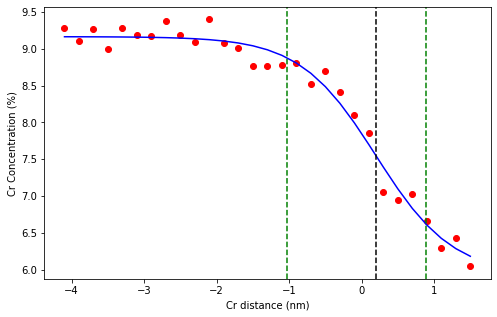

In [5]:
# Define the sigmoid function
# define a : maximum value, b: minimum, c:logistic growth rate or steepness, d: x_mid point 

def fit_sigmoid(x, y):
    # nonlinear least squares curve fitting with sigmoid fuction
    # bounds are the Lower and upper bounds on parameters. Important to avoid the covariance error
    
    def sigmoid(x, c, d):
        a = -3.24
        b = 9.167
        return a / (1. + np.exp(-c * (x - d))) + b


    (c_, d_), _ = opt.curve_fit(sigmoid, x, y, bounds=([-5, -0.7], [5, 0.7]))
    
    a = -2.84
    b = 9.167
    
    a_ = a
    b_ = b

    #print a, b, c, d values
    print ("a_: " + str(a_),  "  b_(y_min): " + str(b_), "  c_(steepness): " + str(c_) ," d_(x0_mid): " + str(d_))

    # define and print the y_max, y_min, y_90, and y_10 values
    y_max = a_+ b_
    y_90 = a_*0.9+b_
    y_10 = a_*0.1+b_
    y_min = b_
    print("y_max : "+ str(y_max), "  y_90: " + str(y_90), "  y_10: " + str(y_10), "  y_min: " + str(b_))

    # fitting with sigmoid fuction
    y_fit = sigmoid(x, c_, d_)

    print('R^2: ', r2_score(y_fit, y))

    # define sigmiod 90, 10% fuction.
    def fp(p) :
        f1 = sigmoid(p, c_, d_) - y_90
        return f1

    def fq(q) :
        f2 = sigmoid(q, c_, d_) - y_10
        return f2
    
    #Solving the equation (p=90%, q= 10%)
    p_sol = fsolve(fp,0)
    q_sol = fsolve(fq,0)
    x_gab = q_sol-p_sol

    print("x_90", str(p_sol),"x_10: ", str(q_sol), "x_gap: ", str(x_gab))

    # plot with 10- 90% window
    fig, ax = plt.subplots(1, 1, figsize=(8, 5))
    ax.plot(x, y, 'ro')
    ax.plot(x, y_fit, 'b-')
    plt.axvline(x=d_, color='k', linestyle='--')
    plt.axvline(x=p_sol, color='g', linestyle='--')
    plt.axvline(x=q_sol, color='g', linestyle='--')
    plt.xlabel("Cr distance (nm)")
    plt.ylabel('Cr Concentration (%)')
    
    return

# assigne x and y values
x = df['distance'].to_numpy()
y = df['Cr'].to_numpy()

# Max, Min, 90%, 10% and width values using fit_sigmoid fuction
fit_sigmoid(x, y)

a_: -0.46   b_(y_min): 2.107   c_(steepness): 2.6708639885708014  d_(x0_mid): -0.10426303978139385
y_max : 1.6470000000000002   y_90: 1.693   y_10: 2.0610000000000004   y_min: 2.107
R^2:  0.9201103192852191
x_90 [0.49742442] x_10:  [-0.95897745] x_gap:  [-1.45640187]


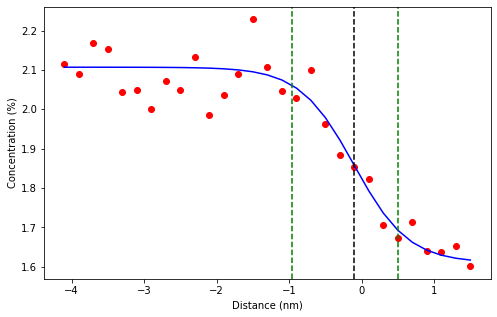

In [6]:
# Define the sigmoid function
# define a : maximum value, b: minimum, c:logistic growth rate or steepness, d: x_mid point 

def fit_sigmoid(x, y):
    # nonlinear least squares curve fitting with sigmoid fuction
    # bounds are the Lower and upper bounds on parameters. Important to avoid the covariance error
    
    def sigmoid(x, c, d):
        a = -0.497
        b = 2.107
        return a / (1. + np.exp(-c * (x - d))) + b


    (c_, d_), _ = opt.curve_fit(sigmoid, x, y, bounds=([-5, -0.7], [5, 0.7]))
    
    a = -0.46
    b = 2.107
    
    a_ = a
    b_ = b

    #print a, b, c, d values
    print ("a_: " + str(a_),  "  b_(y_min): " + str(b_), "  c_(steepness): " + str(c_) ," d_(x0_mid): " + str(d_))

    # define and print the y_max, y_min, y_90, and y_10 values
    y_max = a_+ b_
    y_90 = a_*0.9+b_
    y_10 = a_*0.1+b_
    y_min = b_
    print("y_max : "+ str(y_max), "  y_90: " + str(y_90), "  y_10: " + str(y_10), "  y_min: " + str(b_))

    # fitting with sigmoid fuction
    y_fit = sigmoid(x, c_, d_)

    print('R^2: ', r2_score(y_fit, y))

    # define sigmiod 90, 10% fuction.
    def fp(p) :
        f1 = sigmoid(p, c_, d_) - y_90
        return f1

    def fq(q) :
        f2 = sigmoid(q, c_, d_) - y_10
        return f2
    
    #Solving the equation (p=90%, q= 10%)
    p_sol = fsolve(fp,0)
    q_sol = fsolve(fq,0)
    x_gab = q_sol-p_sol

    print("x_90", str(p_sol),"x_10: ", str(q_sol), "x_gap: ", str(x_gab))

    # plot with 10- 90% window
    fig, ax = plt.subplots(1, 1, figsize=(8, 5))
    ax.plot(x, y, 'ro')
    ax.plot(x, y_fit, 'b-')
    plt.axvline(x=d_, color='k', linestyle='--')
    plt.axvline(x=p_sol, color='g', linestyle='--')
    plt.axvline(x=q_sol, color='g', linestyle='--')
    plt.xlabel("Distance (nm)")
    plt.ylabel('Concentration (%)')
    
    return

# assigne x and y values
x = df['distance'].to_numpy()
y = df['Re'].to_numpy()

# Max, Min, 90%, 10% and width values using fit_sigmoid fuction
fit_sigmoid(x, y)